In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np

In [2]:
punkty = gpd.read_file('../data/raw/esa_202305140715CEST.csv')
granice = gpd.read_file('../data/shapes/granice_województw.shp')

## Measurement dataset

In [3]:
punkty.shape

(1613, 13)

In [4]:
punkty.head()

,NAME,STREET,POST_CODE,CITY,LONGITUDE,LATITUDE,HUMIDITY_AVG,PRESSURE_AVG,TEMPERATURE_AVG,PM10_AVG,PM25_AVG,TIMESTAMP,geometry
0,SZKO?A PODSTAWOWA W D?UGO??CE,,19-111,D?UGO??KA,22.8683732,53.2753471,78.30833333333334,1007.9916666666667,9.058333333333334,24.891666666666666,21.291666666666668,2023-05-14 06:00:00.0,None
1,SZKO?A PODSTAWOWA NR 2 IM. KAZIMIERZA BRODZI?...,ORACKA,32-700,BOCHNIA,20.4250867479996,49.9702658831946,69.4,999.0,0.20000000000000004,89.0,51.0,2023-05-14 06:00:00.0,None
2,I LICEUM OG?LNOKSZTA?C?CE IM. HENRYKA SIENKIEW...,UL. 17 MARCA,82-200,MALBORK,19.0379763,54.0361319,75.675,1021.5333333333333,11.866666666666667,22.483333333333334,20.291666666666668,2023-05-14 06:00:00.0,None
3,SZKO?A PODSTAWOWA NR 16 W ZABRZU,UL. J?ZEFA LOMPY,41-806,ZABRZE,18.8139578,50.2870184,76.85833333333333,990.6999999999999,8.799999999999999,27.558333333333334,25.650000000000002,2023-05-14 06:00:00.0,None
4,SZKO?A PODSTAWOWA NR 1 IM. W?ADYS?AWA JAGIE??Y...,G??WNA,32-608,OSIEK,19.2631410879493,49.9511789367323,75.78888888888889,990.3333333333334,6.644444444444444,27.444444444444443,18.444444444444443,2023-05-14 06:00:00.0,None


In [5]:
punkty.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1613 entries, 0 to 1612
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   NAME             1613 non-null   object  
 1   STREET           1613 non-null   object  
 2   POST_CODE        1613 non-null   object  
 3   CITY             1613 non-null   object  
 4   LONGITUDE        1613 non-null   object  
 5   LATITUDE         1613 non-null   object  
 6   HUMIDITY_AVG     1613 non-null   object  
 7   PRESSURE_AVG     1613 non-null   object  
 8   TEMPERATURE_AVG  1613 non-null   object  
 9   PM10_AVG         1613 non-null   object  
 10  PM25_AVG         1613 non-null   object  
 11  TIMESTAMP        1613 non-null   object  
 12  geometry         0 non-null      geometry
dtypes: geometry(1), object(12)
memory usage: 163.9+ KB


In [6]:
punkty['LONGITUDE'] = punkty['LONGITUDE'].astype('float')
punkty['LATITUDE'] = punkty['LATITUDE'].astype('float')
punkty['HUMIDITY_AVG'] = pd.to_numeric(punkty['HUMIDITY_AVG'], errors='coerce')
punkty['PRESSURE_AVG'] = pd.to_numeric(punkty['PRESSURE_AVG'], errors='coerce')
punkty['TEMPERATURE_AVG'] = pd.to_numeric(punkty['TEMPERATURE_AVG'], errors='coerce')
punkty['PM10_AVG'] = pd.to_numeric(punkty['PM10_AVG'], errors='coerce')
punkty['PM25_AVG'] = pd.to_numeric(punkty['PM25_AVG'], errors='coerce')
punkty['TIMESTAMP'] = pd.to_datetime(punkty['TIMESTAMP'])

In [7]:
punkty = punkty.drop(['STREET', 'POST_CODE', 'geometry'], axis=1)

In [8]:
punkty.head()

,NAME,CITY,LONGITUDE,LATITUDE,HUMIDITY_AVG,PRESSURE_AVG,TEMPERATURE_AVG,PM10_AVG,PM25_AVG,TIMESTAMP
0,SZKO?A PODSTAWOWA W D?UGO??CE,D?UGO??KA,22.868373,53.275347,78.308333,1007.991667,9.058333,24.891667,21.291667,2023-05-14 06:00:00
1,SZKO?A PODSTAWOWA NR 2 IM. KAZIMIERZA BRODZI?...,BOCHNIA,20.425087,49.970266,69.400000,999.000000,0.200000,89.000000,51.000000,2023-05-14 06:00:00
2,I LICEUM OG?LNOKSZTA?C?CE IM. HENRYKA SIENKIEW...,MALBORK,19.037976,54.036132,75.675000,1021.533333,11.866667,22.483333,20.291667,2023-05-14 06:00:00
3,SZKO?A PODSTAWOWA NR 16 W ZABRZU,ZABRZE,18.813958,50.287018,76.858333,990.700000,8.800000,27.558333,25.650000,2023-05-14 06:00:00
4,SZKO?A PODSTAWOWA NR 1 IM. W?ADYS?AWA JAGIE??Y...,OSIEK,19.263141,49.951179,75.788889,990.333333,6.644444,27.444444,18.444444,2023-05-14 06:00:00


In [9]:
punkty.describe()

,LONGITUDE,LATITUDE,HUMIDITY_AVG,PRESSURE_AVG,TEMPERATURE_AVG,PM10_AVG,PM25_AVG
count,1613.000000,1613.000000,1610.000000,1610.000000,1610.000000,1613.000000,1613.000000
mean,18.916736,51.235502,83.490114,999.472115,8.321663,28.079793,21.845077
std,2.297866,2.845879,12.921988,14.717586,3.580090,12.372833,9.728757
min,0.000000,0.000000,0.000000,930.000000,-40.000000,0.000000,0.000000
25%,16.990947,50.211892,76.937500,991.333333,6.858333,20.300000,15.216667
50%,18.940100,51.150780,84.929167,1001.091667,8.191667,27.466667,21.466667
75%,20.684812,52.387907,92.322917,1009.864583,9.856250,34.508333,27.300000
max,23.873936,54.661981,100.000000,1100.000000,39.461667,183.533333,112.106667


In [10]:
punkty.loc[punkty['LATITUDE'] <= 0]

,NAME,CITY,LONGITUDE,LATITUDE,HUMIDITY_AVG,PRESSURE_AVG,TEMPERATURE_AVG,PM10_AVG,PM25_AVG,TIMESTAMP
287,SZKO?A PODSTAWOWA IM. LOTNIK?W POLSKICH W P?OC...,P?OCICZNO-TARTAK,0.0,0.0,87.308333,1006.366667,8.850000,19.366667,19.008333,2023-05-14 06:00:00
545,SZKO?A PODSTAWOWA W ?WIECY,?WIECA,0.0,0.0,84.958333,1006.958333,7.316667,26.258333,22.791667,2023-05-14 06:00:00
791,SZKO?A PODSTAWOWA NR 3 IM. JANUSZA KUSOCI?SKIE...,LEGIONOWO,0.0,0.0,100.000000,1013.691667,9.008333,44.400000,30.283333,2023-05-14 06:00:00
1391,SZKO?A PODSTAWOWA NR 2 IM. BATALION?W CH?OPSKI...,SU?OSZOWA,0.0,0.0,100.000000,968.516667,6.150000,18.458333,15.483333,2023-05-14 06:00:00


In [11]:
punkty = punkty.loc[punkty['LATITUDE'] > 0]

In [12]:
punkty.isnull().sum()

NAME               0
CITY               0
LONGITUDE          0
LATITUDE           0
HUMIDITY_AVG       3
PRESSURE_AVG       3
TEMPERATURE_AVG    3
PM10_AVG           0
PM25_AVG           0
TIMESTAMP          0
dtype: int64

In [13]:
punkty.skew()

/tmp/ipykernel_4103/2457489618.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  punkty.skew()


LONGITUDE          0.132747
LATITUDE           0.466369
HUMIDITY_AVG      -1.685302
PRESSURE_AVG      -0.733095
TEMPERATURE_AVG   -3.214711
PM10_AVG           1.996395
PM25_AVG           1.157900
dtype: float64

In [14]:
punkty.head()

,NAME,CITY,LONGITUDE,LATITUDE,HUMIDITY_AVG,PRESSURE_AVG,TEMPERATURE_AVG,PM10_AVG,PM25_AVG,TIMESTAMP
0,SZKO?A PODSTAWOWA W D?UGO??CE,D?UGO??KA,22.868373,53.275347,78.308333,1007.991667,9.058333,24.891667,21.291667,2023-05-14 06:00:00
1,SZKO?A PODSTAWOWA NR 2 IM. KAZIMIERZA BRODZI?...,BOCHNIA,20.425087,49.970266,69.400000,999.000000,0.200000,89.000000,51.000000,2023-05-14 06:00:00
2,I LICEUM OG?LNOKSZTA?C?CE IM. HENRYKA SIENKIEW...,MALBORK,19.037976,54.036132,75.675000,1021.533333,11.866667,22.483333,20.291667,2023-05-14 06:00:00
3,SZKO?A PODSTAWOWA NR 16 W ZABRZU,ZABRZE,18.813958,50.287018,76.858333,990.700000,8.800000,27.558333,25.650000,2023-05-14 06:00:00
4,SZKO?A PODSTAWOWA NR 1 IM. W?ADYS?AWA JAGIE??Y...,OSIEK,19.263141,49.951179,75.788889,990.333333,6.644444,27.444444,18.444444,2023-05-14 06:00:00


/tmp/ipykernel_4103/4039166615.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  punkty[['HUMIDITY_AVG', 'PRESSURE_AVG', 'TEMPERATURE_AVG', 'PM10_AVG', 'PM25_AVG']].hist(ax=ax, bins=40)


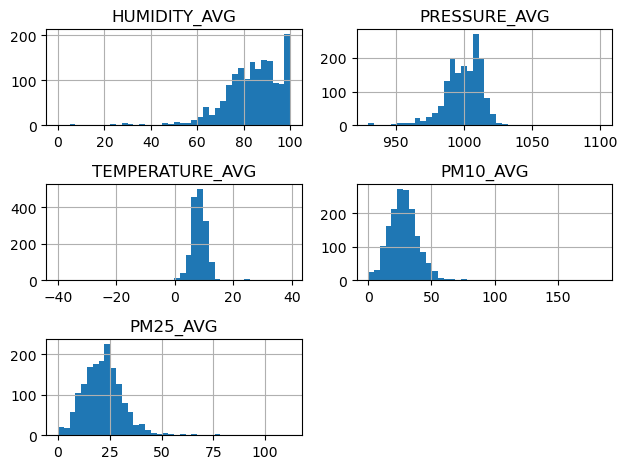

In [15]:
fig, ax = plt.subplots()
punkty[['HUMIDITY_AVG', 'PRESSURE_AVG', 'TEMPERATURE_AVG', 'PM10_AVG', 'PM25_AVG']].hist(ax=ax, bins=40)
plt.tight_layout()

## Handling PM10, PM2.5 Outliers

<Axes: >

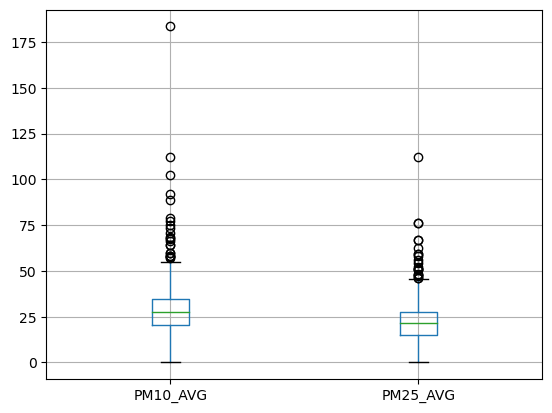

In [16]:
punkty.boxplot(column=['PM10_AVG', 'PM25_AVG'])

In [17]:
pm25_q1 = punkty['PM25_AVG'].quantile(0.25)
pm25_q3 = punkty['PM25_AVG'].quantile(0.75)
iqr = pm25_q3 - pm25_q1

pm10_q1 = punkty['PM10_AVG'].quantile(0.25)
pm10_q3 = punkty['PM10_AVG'].quantile(0.75)
iqr = pm10_q3 - pm10_q1

In [18]:
low_pm25_boundary = pm25_q1 - 1.5 * iqr
high_pm25_boundary = pm25_q3 + 1.5 * iqr

low_pm10_boundary = pm10_q1 - 1.5 * iqr
high_pm10_boundary = pm10_q3 + 1.5 * iqr

In [19]:
low_pm25_outliers = punkty.loc[punkty['PM25_AVG'] < low_pm10_boundary]
high_pm25_outliers = punkty.loc[punkty['PM25_AVG'] > high_pm10_boundary]

low_pm10_outliers = punkty.loc[punkty['PM10_AVG'] < low_pm10_boundary]
high_pm10_outliers = punkty.loc[punkty['PM10_AVG'] > high_pm10_boundary]

In [20]:
pm25_outliers = pd.concat([low_pm25_outliers, high_pm25_outliers])
pm10_outliers = pd.concat([low_pm10_outliers, high_pm10_outliers])

In [21]:
pm25_outliers

,NAME,CITY,LONGITUDE,LATITUDE,HUMIDITY_AVG,PRESSURE_AVG,TEMPERATURE_AVG,PM10_AVG,PM25_AVG,TIMESTAMP
371,III LICEUM OG?LNOKSZTA?C?CE W PABIANICACH,PABIANICE,19.361553,51.665000,80.408333,1000.016667,8.908333,77.525000,76.441667,2023-05-14 06:00:00
543,PUBLICZNA SZKO?A PODSTAWOWA NR 17 IM. PRZYJACI...,RADOM,21.130880,51.371346,84.875000,1003.225000,7.375000,68.375000,55.925000,2023-05-14 06:00:00
760,PUBLICZNA SZKO?A PODSTAWOWA W RZECZNIOWIE,RZECZNI?W,21.427961,51.126970,84.433333,1000.891667,8.850000,78.950000,66.825000,2023-05-14 06:00:00
870,SZKO?A PODSTAWOWA NR 15 IM. JANA III SOBIESKIE...,POZNA?,16.907751,52.465225,73.566667,1007.666667,9.733333,183.533333,112.106667,2023-05-14 06:00:00
938,Technikum Informatyczne przy Noworudzkiej Szko...,Nowa Ruda,16.512590,50.591649,NaN,NaN,NaN,43.000000,58.000000,2023-05-14 06:00:00
1013,SZKO?A PODSTAWOWA NR 2 IM. KR?LOWEJ JADWIGI W ...,PLESZEW,17.783840,51.894900,61.166667,1006.908333,18.258333,70.625000,58.983333,2023-05-14 06:00:00
1065,ZESP?? SZKOLNO-PRZEDSZKOLNY W MODRZU,MODRZE,16.632400,52.214680,63.900000,1016.166667,9.966667,102.466667,59.210000,2023-05-14 06:00:00
1357,BRAN?OWA SZKO?A SPECJALNA I STOPNIA W PLESZEWIE,PLESZEW,17.787055,51.896329,84.133333,1006.850000,9.866667,73.466667,62.775000,2023-05-14 06:00:00
1592,III LICEUM OG?LNOKSZTA?C?CE W ZESPOLE SZK?? NR...,PSZCZYNA,18.945466,49.965741,81.808333,990.208333,7.691667,112.016667,76.258333,2023-05-14 06:00:00
1608,PUBLICZNA SZKO?A PODSTAWOWA NR 30 IM. KR?LOWEJ...,RADOM,21.158018,51.431975,81.783333,1005.908333,9.108333,75.091667,67.050000,2023-05-14 06:00:00


In [22]:
punkty_pm25 = punkty[~punkty.index.isin(pm25_outliers.index)]
punkty_pm10 = punkty[~punkty.index.isin(pm10_outliers.index)]

In [23]:
print(f'PM10 (% of outliers): {pm10_outliers["PM10_AVG"].count()/punkty["PM10_AVG"].count()*100:.2f}%')
print(f'PM2,5 (% of outliers): {pm25_outliers["PM25_AVG"].count()/punkty["PM25_AVG"].count()*100:.2f}%')

PM10 (% of outliers): 1.43%
PM2,5 (% of outliers): 0.62%


In [24]:
assert punkty['PM25_AVG'].count() - pm25_outliers['PM25_AVG'].count() == punkty_pm25['PM25_AVG'].count()
assert punkty['PM10_AVG'].count() - pm10_outliers['PM10_AVG'].count() == punkty_pm10['PM10_AVG'].count()

<Axes: >

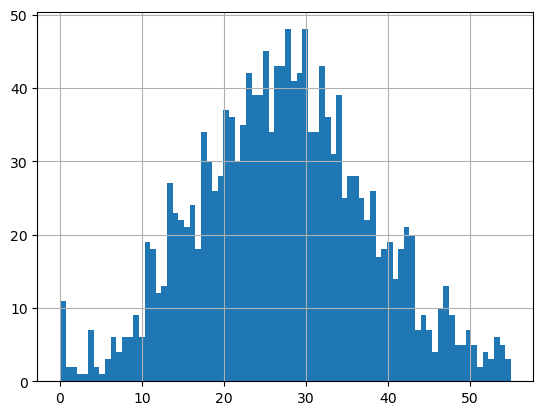

In [25]:
punkty_pm10['PM10_AVG'].hist(bins=80)

In [26]:
punkty_pm10.skew()

/tmp/ipykernel_4103/690156340.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  punkty_pm10.skew()


LONGITUDE          0.138128
LATITUDE           0.467457
HUMIDITY_AVG      -1.696375
PRESSURE_AVG      -0.727509
TEMPERATURE_AVG   -3.243876
PM10_AVG           0.075664
PM25_AVG           0.166568
dtype: float64

<Axes: >

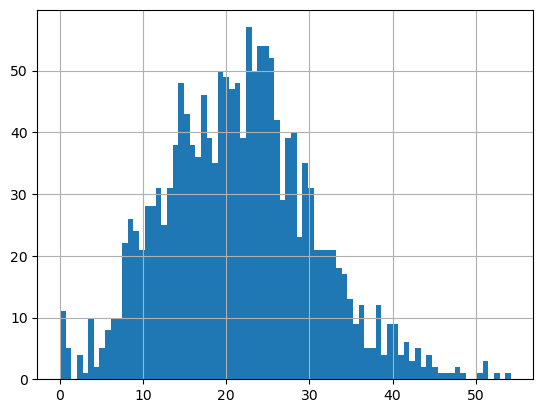

In [27]:
punkty_pm25['PM25_AVG'].hist(bins=80)

In [28]:
punkty_pm25.skew()

/tmp/ipykernel_4103/2466300823.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  punkty_pm25.skew()


LONGITUDE          0.131762
LATITUDE           0.468135
HUMIDITY_AVG      -1.692352
PRESSURE_AVG      -0.728593
TEMPERATURE_AVG   -3.236883
PM10_AVG           0.435530
PM25_AVG           0.289914
dtype: float64

## Shape data

In [29]:
granice.head()

,JPT_SJR_KO,JPT_KOD_JE,JPT_NAZWA_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,JPT_KOD__1,JPT_NAZWA1,...,JPT_KJ_I_1,JPT_KJ_I_2,JPT_OPIS,JPT_SPS_KO,ID_BUFOR_1,JPT_ID,JPT_KJ_I_3,Shape_Leng,Shape_Area,geometry
0,WOJ,24,śląskie,0,2017-10-10,NaN,2012-09-26,NaN,NaN,NaN,...,24,NaN,NaN,UZG,0,1331323,NaN,12.136952,1.557335,"MULTIPOLYGON (((18.91685 51.09608, 18.91677 51..."
1,WOJ,16,opolskie,0,2017-10-10,NaN,2012-09-26,NaN,NaN,NaN,...,16,NaN,NaN,UZG,0,1331326,NaN,9.005207,1.196205,"POLYGON ((17.81203 51.18669, 17.81209 51.18670..."
2,WOJ,26,świętokrzyskie,0,2012-09-26,NaN,2012-09-26,NaN,NaN,NaN,...,26,NaN,NaN,UZG,0,829374,NaN,9.264959,1.491827,"POLYGON ((19.70430 50.75239, 19.70443 50.75248..."
3,WOJ,22,pomorskie,0,2020-04-09,NaN,2012-09-26,NaN,NaN,NaN,...,22,NaN,NaN,UZG,0,1358902,NaN,13.167595,2.520630,"POLYGON ((17.66483 54.78297, 17.66653 54.78334..."
4,WOJ,20,podlaskie,0,2019-03-21,NaN,2012-09-26,NaN,NaN,NaN,...,20,NaN,NaN,UZG,0,1353685,NaN,11.101166,2.718484,"POLYGON ((21.98108 52.97859, 21.98078 52.97861..."


Text(0.5, 1.0, 'Distribution of points with measured values of PM10 in Poland (2023-05-14 06:00)')

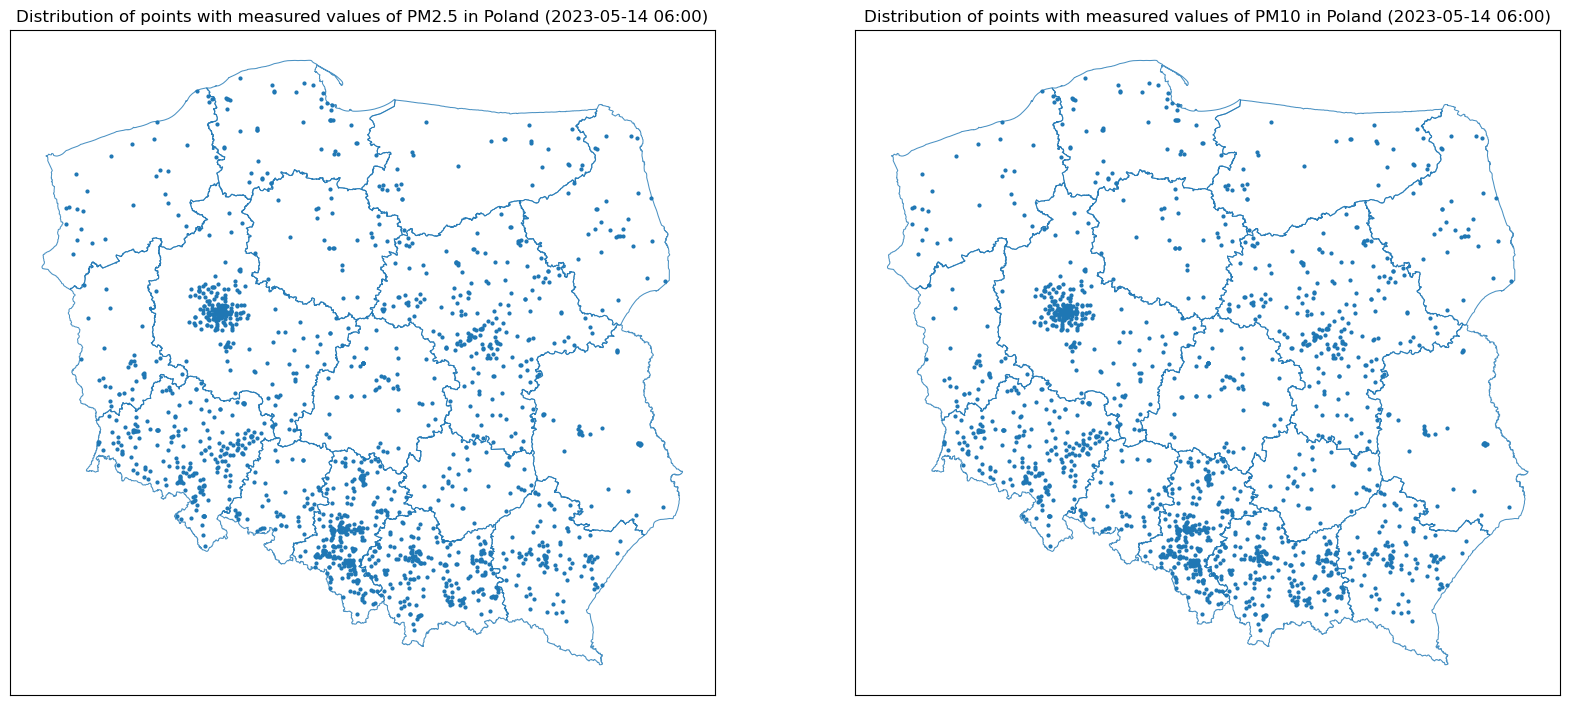

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
granice.boundary.plot(ax=axs[0], linewidth=0.75, alpha=0.8)
punkty_pm25.plot(ax=axs[0], kind='scatter', x='LONGITUDE', y='LATITUDE', s=4)
axs[0].get_xaxis().set_visible(False)
axs[0].get_yaxis().set_visible(False)
axs[0].set_title('Distribution of points with measured values of PM2.5 in Poland (2023-05-14 06:00)')

granice.boundary.plot(ax=axs[1], linewidth=0.75, alpha=0.8)
punkty_pm10.plot(ax=axs[1], kind='scatter', x='LONGITUDE', y='LATITUDE', s=4)
axs[1].get_xaxis().set_visible(False)
axs[1].get_yaxis().set_visible(False)
axs[1].set_title('Distribution of points with measured values of PM10 in Poland (2023-05-14 06:00)')